<a href="https://www.kaggle.com/code/toddgardiner/s4e10-visual-eda-matplotlib-seaborn?scriptVersionId=206754261" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Visual EDA
Season 4 Episode 10

The goal of this notebook is to visually characterize the data. We'll of course do all the math in the background, but we'd like to see if each of the training columns is a representative sample of the test data.

If you are interested in interactive visualizations, go here https://www.kaggle.com/code/toddgardiner/s4e10-interactive-visual-eda

In [1]:
#import the libraries we need
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import seaborn as sb
import numpy as np
# import warnings
# warnings.filterwarnings("ignore")
import plotly.express as px
from wordcloud import WordCloud

In [2]:
#import the data
train = pd.read_csv("/kaggle/input/playground-series-s4e10/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s4e10/test.csv")
print("Train Shape: " , train.shape)
print("Test Shape: ", test.shape)


Train Shape:  (58645, 13)
Test Shape:  (39098, 12)


# Check for NAs

In [3]:
# How many NAs in the Data (missing values)
print("Train DF Missing Values:")
p = 0 # counter
for i in list(train.columns):
    if train[i].isna().sum() >0:
        print(f"Column {i} has {train[i].isna().sum()} NAs")
    else:
        p +=1
if p == len(list(train.columns)):  print("NO NAs in This DF")
    
print("\nTest DF Missing Values:")
p=0 # counter
for i in list(test.columns):
    if test[i].isna().sum() > 0:
        print(f"Column {i} has {test[i].isna().sum()} NAs")
    else:
        p +=1
if p == len(list(test.columns)):  print("NO NAs in This DF")

Train DF Missing Values:
NO NAs in This DF

Test DF Missing Values:
NO NAs in This DF


# Look at Age of Borrowers

In [4]:

print(f"Train Age Range: {train.person_age.min()} - {train.person_age.max()} years old")
print(f"Test Age Range: {test.person_age.min()} - {test.person_age.max()} years old")
    

Train Age Range: 20 - 123 years old
Test Age Range: 20 - 94 years old


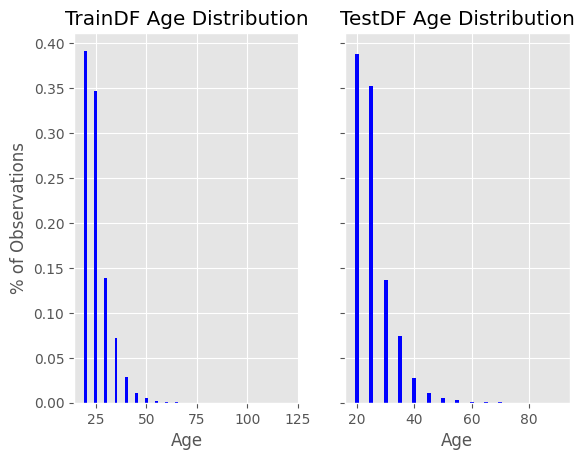

('Train:',
     age    cnt      perc
 0    20  22979  0.391832
 1    25  20368  0.347310
 2    30   8162  0.139176
 3    35   4252  0.072504
 4    40   1711  0.029176
 5    45    608  0.010367
 6    50    329  0.005610
 7    55    129  0.002200
 8    60     58  0.000989
 9    65     30  0.000512
 10   70     13  0.000222
 11   75      1  0.000017
 12   80      4  0.000068
 13  120      1  0.000017,
 '\nTest',
     age    cnt      perc
 0    20  15162  0.387795
 1    25  13806  0.353113
 2    30   5326  0.136222
 3    35   2916  0.074582
 4    40   1088  0.027828
 5    45    413  0.010563
 6    50    210  0.005371
 7    55    107  0.002737
 8    60     36  0.000921
 9    65     21  0.000537
 10   70     11  0.000281
 11   80      1  0.000026
 12   90      1  0.000026)

In [5]:
# What is makeup of the Age Groups. Do train and test match???
ty = (pd.Series(train['person_age']//5)*5).value_counts() #bin to 5 years
ty = ty.sort_index() # sort by age
ty = ty.reset_index() # move age to a callable column
ty.columns = ['age','cnt'] # define column names
ty['perc'] = ty.cnt/ ty.cnt.sum() # compute percentages
tye = (pd.Series(test['person_age']//5)*5).value_counts() #repeat steps for test DF
tye= tye.sort_index()
tye = tye.reset_index()
tye.columns = ['age','cnt']
tye['perc'] = tye.cnt/ tye.cnt.sum() 

#plot
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.bar(ty.age ,  ty.perc, color="blue", width=1.4) 
ax1.set_title("TrainDF Age Distribution")
ax1.set_xlabel("Age")
ax1.set_ylabel("% of Observations")
ax2.bar(tye.age,  tye.perc , color="blue", width=1.4) 
ax2.set_title("TestDF Age Distribution")
ax2.set_xlabel("Age")
plt.show()


"Train:", ty, '\nTest', tye


# Income Levels

In [6]:

print(f"Train Income Range: ${train.person_income.min()} - ${train.person_income.max()} ")
print(f"Test Income Range: ${test.person_income.min()} - ${test.person_income.max()} ")
    

Train Income Range: $4200 - $1900000 
Test Income Range: $4000 - $1900000 


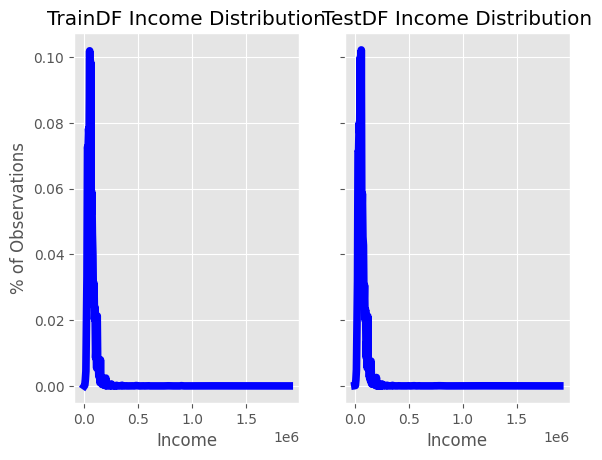

('Train:',
      income   cnt      perc
 0         0     1  0.000017
 1      5000    15  0.000256
 2     10000   113  0.001927
 3     15000   262  0.004468
 4     20000  1118  0.019064
 ..      ...   ...       ...
 91   945000     1  0.000017
 92  1200000     2  0.000034
 93  1820000     1  0.000017
 94  1835000     1  0.000017
 95  1900000     1  0.000017
 
 [96 rows x 3 columns],
 'Test:',
      income  cnt      perc
 0         0    4  0.000102
 1      5000    5  0.000128
 2     10000   72  0.001842
 3     15000  196  0.005013
 4     20000  712  0.018211
 ..      ...  ...       ...
 88   850000    1  0.000026
 89   900000    1  0.000026
 90  1200000    2  0.000051
 91  1780000    1  0.000026
 92  1900000    1  0.000026
 
 [93 rows x 3 columns])

In [7]:
# What is makeup of the Income Levels. Do train and test match???
ty = (pd.Series(train['person_income']//5000)*5000).value_counts() #bin to $5000 increments
ty = ty.sort_index() # sort by income
ty = ty.reset_index() # move income to a callable column
ty.columns = ['income','cnt'] # define column names
ty['perc'] = ty.cnt/ ty.cnt.sum() # compute percentages
#print(ty)

tye = (pd.Series(test['person_income']//5000)*5000).value_counts() #repeat steps for test DF
tye= tye.sort_index()
tye = tye.reset_index()
tye.columns = ['income','cnt']
tye['perc'] = tye.cnt/ tye.cnt.sum() 

#plot
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(ty.income ,  ty.perc, color="blue",linewidth = '5.5' ) 
ax1.set_title("TrainDF Income Distribution")
ax1.set_xlabel("Income")
ax1.set_ylabel("% of Observations")
ax2.plot(tye.income,  tye.perc , color="blue",linewidth = '5.5') 
ax2.set_title("TestDF Income Distribution")
ax2.set_xlabel("Income")
plt.show()


"Train:", ty, 'Test:', tye


# Borrowers' Home Disposition

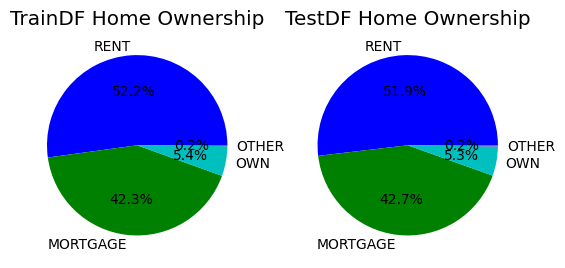

('Train:',
 person_home_ownership
 RENT        30594
 MORTGAGE    24824
 OWN          3138
 OTHER          89
 Name: count, dtype: int64,
 '\nTest',
 person_home_ownership
 RENT        20280
 MORTGAGE    16683
 OWN          2056
 OTHER          79
 Name: count, dtype: int64)

In [8]:
# What is makeup of Home Ownership, Mortgage Payments, & Renting
ty = train['person_home_ownership'].value_counts()
tye = test['person_home_ownership'].value_counts()

f, (ax1, ax2) = plt.subplots(1, 2, sharey=False) 
ax1.pie(x=ty.values, labels=ty.index, colors=['b','g','c','m','y','k','r'], autopct='%1.1f%%') 
ax1.set_title("TrainDF Home Ownership")
ax2.pie(x=tye.values, labels=tye.index, autopct='%1.1f%%', colors=['b','g','c','m','y','k','r'],) 
ax2.set_title("TestDF Home Ownership")
plt.show()

"Train:", ty, '\nTest', tye


# Employment Duration

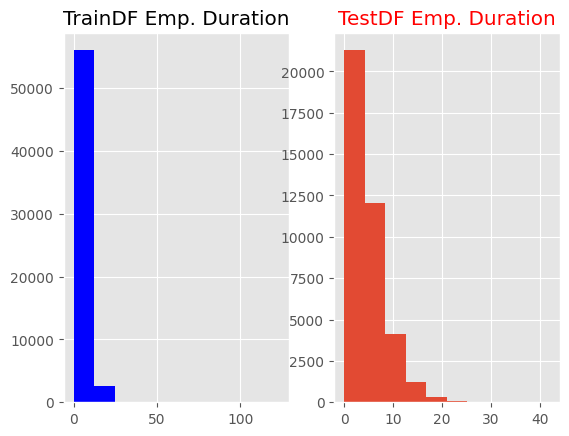

Training Set Employment Length:
     Employment Length   cnt      perc
0                 0.0  7586  0.129355
5                 1.0  5203  0.088720
1                 2.0  7270  0.123966
2                 3.0  6475  0.110410
4                 4.0  5461  0.093120
3                 5.0  5839  0.099565
6                 6.0  4902  0.083588
7                 7.0  4275  0.072896
8                 8.0  3015  0.051411
9                 9.0  2290  0.039049
12               10.0  1072  0.018279
10               11.0  1491  0.025424
11               12.0  1105  0.018842
13               13.0   797  0.013590
14               14.0   590  0.010061
15               15.0   367  0.006258
16               16.0   280  0.004774
17               17.0   168  0.002865
18               18.0   153  0.002609
20               19.0    72  0.001228
21               20.0    65  0.001108
19               21.0    78  0.001330
22               22.0    20  0.000341
24               23.0    12  0.000205
23               

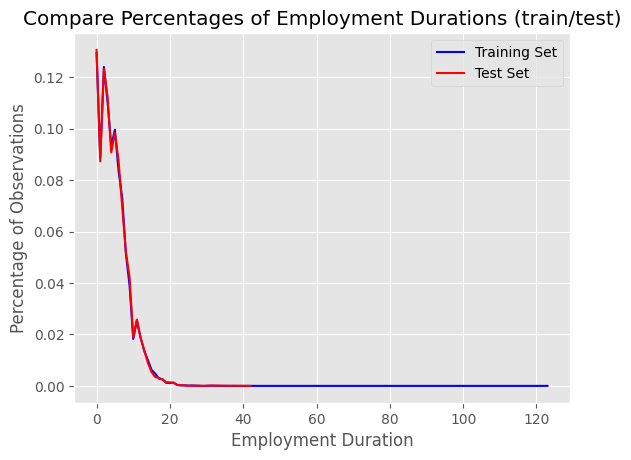

In [9]:
# what about employment duration?

from matplotlib.ticker import PercentFormatter

f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
ax1.hist(train.person_emp_length, color='blue') 
ax1.set_title("TrainDF Emp. Duration")
ax2.hist(test.person_emp_length) 
ax2.set_title("TestDF Emp. Duration", color='red')
plt.show()

tr = train.person_emp_length.value_counts().reset_index()
tr.columns = ['Employment Length', 'cnt']
tr['perc'] = tr['cnt'] / tr['cnt'].sum()
tr = tr.sort_values('Employment Length')
print("Training Set Employment Length:\n",tr)

te = test.person_emp_length.value_counts().reset_index()
te.columns = ['Employment Length', 'cnt']
te['perc'] = te['cnt'] / te['cnt'].sum()
te = te.sort_values('Employment Length')
print("Testing Set Employment Length:\n",te)


plt.plot(tr['Employment Length'], tr.perc, color='blue')
plt.plot(te['Employment Length'], te.perc, color='red')
plt.xlabel("Employment Duration")
plt.ylabel('Percentage of Observations')
plt.title("Compare Percentages of Employment Durations (train/test)")
plt.legend(['Training Set','Test Set'])
plt.show()

# Loan Intent

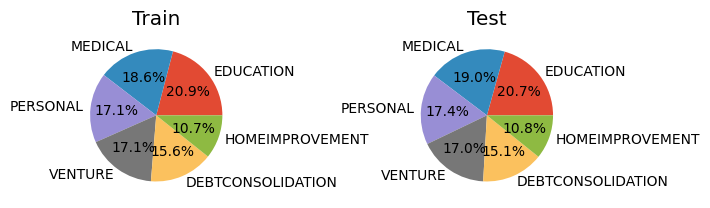

Train:
               intent  number      perc
0          EDUCATION   12271  0.209242
1            MEDICAL   10934  0.186444
2           PERSONAL   10016  0.170790
3            VENTURE   10011  0.170705
4  DEBTCONSOLIDATION    9133  0.155734
5    HOMEIMPROVEMENT    6280  0.107085 

Test:
               intent  number      perc
0          EDUCATION    8076  0.206558
1            MEDICAL    7447  0.190470
2           PERSONAL    6815  0.174306
3            VENTURE    6632  0.169625
4  DEBTCONSOLIDATION    5915  0.151287
5    HOMEIMPROVEMENT    4213  0.107755


In [10]:
cy = train.loan_intent.value_counts()
cy = cy.reset_index()
cy['perc'] = cy.iloc[:,1] / cy.iloc[:,1].sum()
cy.columns = ['intent','number','perc']


cye = test.loan_intent.value_counts()
cye= cye.reset_index()
cye['perc'] = cye.iloc[:,1] / cye.iloc[:,1].sum()
cye.columns = ['intent','number','perc']


fig, (ax1,ax2) = plt.subplots(1,2,sharey=False)
ax1.pie(cy.perc,labels=cy.intent, autopct='%1.1f%%')
ax1.set_title("Train")
ax2.pie(cye.perc,labels=cye.intent, autopct='%1.1f%%')
ax2.set_title("Test")
plt.subplots_adjust(hspace=0.5, wspace=1.)
plt.show()

print("Train:\n" , cy, '\n\nTest:\n' , cye)

# Loan Grades

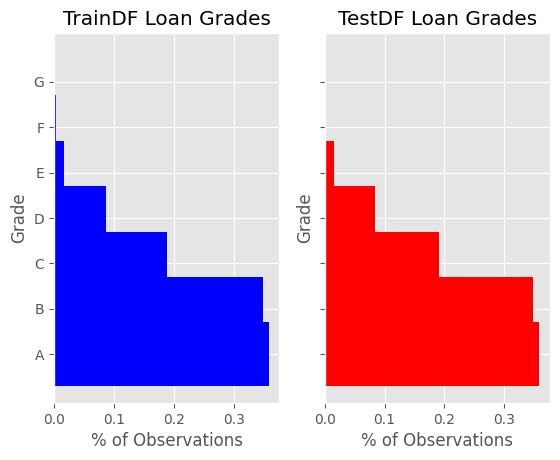

Are these Percentage Values Identical? 
Train Set:
   grade    cnt      perc
0     A  20984  0.357814
1     B  20400  0.347856
2     C  11036  0.188183
3     D   5034  0.085839
4     E   1009  0.017205
5     F    149  0.002541
6     G     33  0.000563 

Test Set:
   grade    cnt      perc
0     A  14005  0.358202
1     B  13604  0.347946
2     C   7460  0.190803
3     D   3269  0.083610
4     E    637  0.016292
5     F    105  0.002686
6     G     18  0.000460


In [11]:
# What is makeup of the Loan Grades. Do train and test match???
ty = train['loan_grade'].value_counts() #get counts
ty = ty.reset_index() # move age to a callable column
ty.columns = ['grade','cnt'] # define column names
ty['perc'] = ty.cnt/ ty.cnt.sum() # compute percentages
tye = test['loan_grade'].value_counts() #repeat steps for test DF
tye = tye.reset_index()
tye.columns = ['grade','cnt']
tye['perc'] = tye.cnt/ tye.cnt.sum() 

#plot
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.barh(ty.grade ,  ty.perc, color="blue", height=1.4) 
ax1.set_title("TrainDF Loan Grades")
ax1.set_ylabel("Grade")
ax1.set_xlabel("% of Observations")
ax2.barh(tye.grade,  tye.perc , color="red", height=1.4) 
ax2.set_title("TestDF Loan Grades")
ax2.set_ylabel("Grade")
ax2.set_xlabel("% of Observations")
plt.show()


print("Are these Percentage Values Identical? ")
print('Train Set:\n', ty , '\n\nTest Set:\n', tye)

# Loan Value

Overlay Training Set on Testing Set:


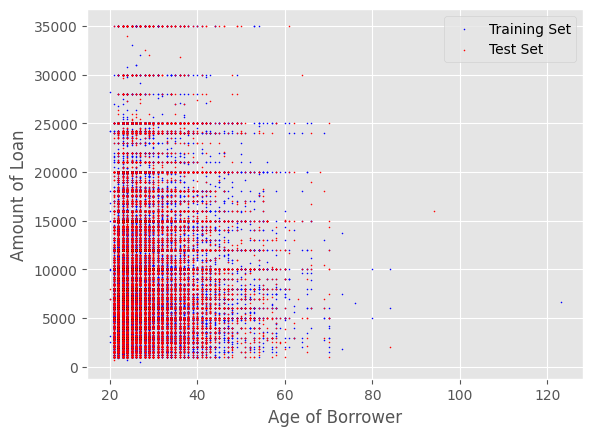

In [12]:
# see Age vs Loan Amount for both Train and Test
print("Overlay Training Set on Testing Set:")
plt.scatter(train.person_age,train.loan_amnt,s=.4, c="blue")
plt.scatter(test.person_age,test.loan_amnt,s=.4, c="red")
plt.xlabel("Age of Borrower")
plt.ylabel('Amount of Loan')
plt.legend(labels=['Training Set','Test Set'], loc='upper right')
plt.show()

Training Set Only:


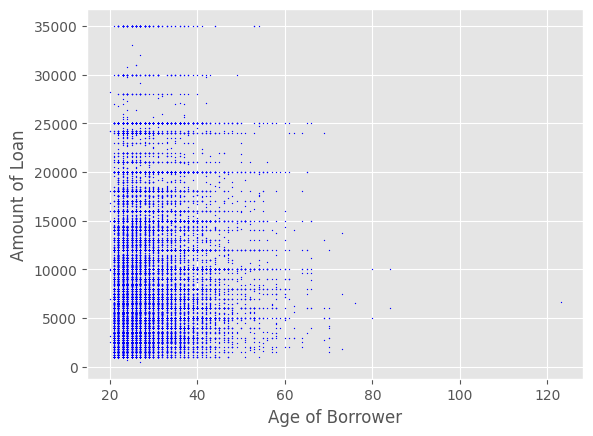

In [13]:
#decompose to train only

print("Training Set Only:")
plt.scatter(train.person_age,train.loan_amnt,s=.2,c='blue')
plt.xlabel("Age of Borrower")
plt.ylabel('Amount of Loan')
plt.show()

Testing Set Only:


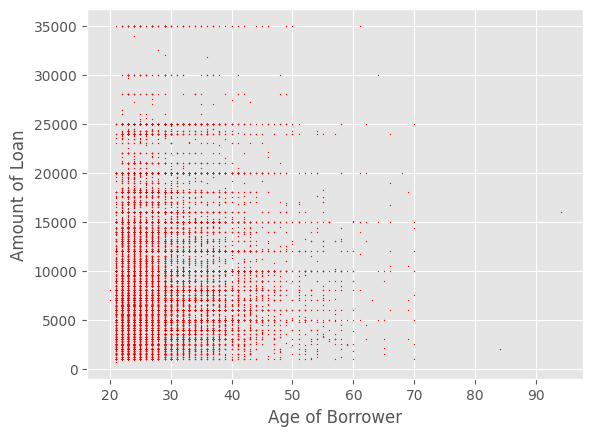

In [14]:
#decompose to test only 
print("Testing Set Only:")
plt.scatter(test.person_age,test.loan_amnt,s=.2,c='red')
plt.xlabel("Age of Borrower")
plt.ylabel('Amount of Loan')
plt.show()

# Loan Percentage of Income

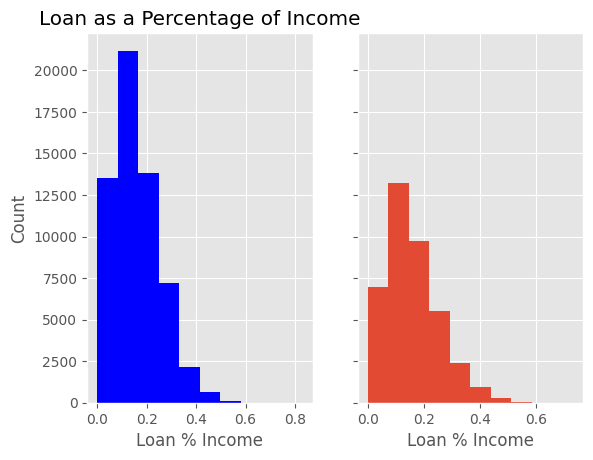

In [15]:
fig , (ax1,ax2) = plt.subplots(1,2,sharey=True)
ax1.hist(train.loan_percent_income, color='blue')
ax1.set_ylabel("Count")
ax1.set_xlabel('Loan % Income')
ax2.hist(test.loan_percent_income)
ax2.set_xlabel('Loan % Income')
ax1.set_title('Loan as a Percentage of Income')
plt.show()

# Loan Interest Rate

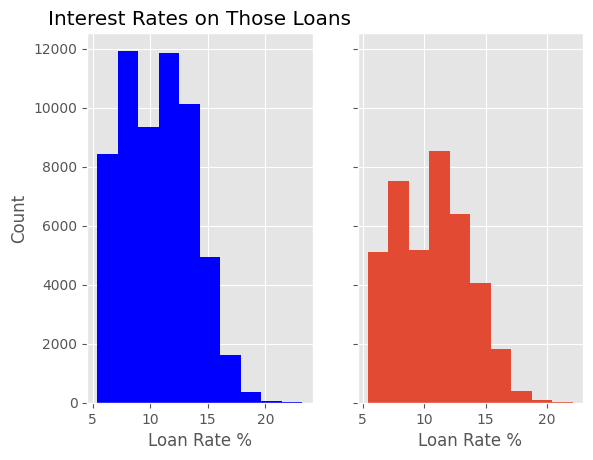

In [16]:
fig , (ax1,ax2) = plt.subplots(1,2,sharey=True)
ax1.hist(train.loan_int_rate, color='blue')
ax1.set_ylabel("Count")
ax1.set_xlabel('Loan Rate %')
ax2.hist(test.loan_int_rate)
ax2.set_xlabel('Loan Rate %')
ax1.set_title("Interest Rates on Those Loans")
plt.show()

Text(0.5, 0, 'Loan % Income')

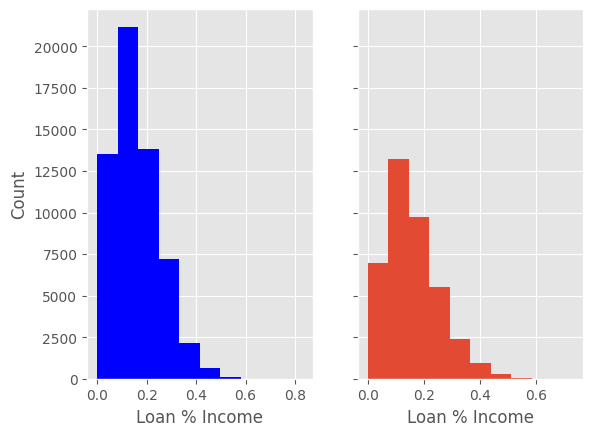

In [17]:
fig , (ax1,ax2) = plt.subplots(1,2,sharey=True)
ax1.hist(train.loan_percent_income, color='blue')
ax1.set_ylabel("Count")
ax1.set_xlabel('Loan % Income')
ax2.hist(test.loan_percent_income)
ax2.set_xlabel('Loan % Income')

# Historical Default Info

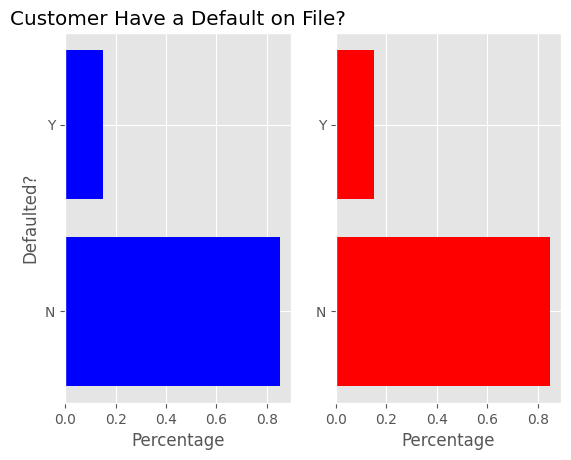

Train Set:
   default    cnt      perc
0       N  49943  0.851616
1       Y   8702  0.148384 

Test Set:
   default    cnt      perc
0       N  33227  0.849839
1       Y   5871  0.150161


In [18]:
trdef = train.cb_person_default_on_file.value_counts().reset_index()
trdef.columns= ['default','cnt']
trdef['perc'] =  trdef.cnt/ trdef.cnt.sum()

tedef = test.cb_person_default_on_file.value_counts().reset_index()
tedef.columns= ['default','cnt']
tedef['perc'] =  tedef.cnt/ tedef.cnt.sum()

fig, (ax1, ax2) = plt.subplots(1,2,sharex= False)
ax1.barh(trdef.default, trdef.perc,color="blue")
ax1.set_xlabel('Percentage')
ax1.set_ylabel('Defaulted?')
ax2.barh(tedef.default , tedef.perc,color='red')
ax2.set_xlabel('Percentage')
ax1.set_title("Customer Have a Default on File?")
plt.show()

print("Train Set:\n", trdef, '\n\nTest Set:\n', tedef)

# Length of Credit Histories

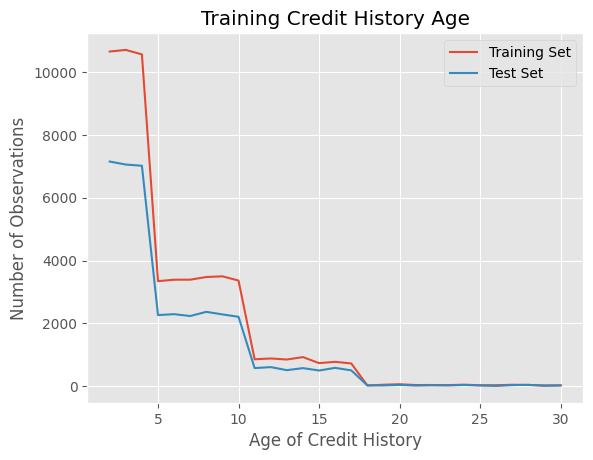

In [19]:
st = train.cb_person_cred_hist_length.value_counts().reset_index()
st.columns = ['age','cnt']
st = st.sort_values('age')

ste= test.cb_person_cred_hist_length.value_counts().reset_index()
ste.columns = ['age','cnt']
ste = ste.sort_values('age')

plt.plot(st.age, st.cnt)
plt.plot(ste.age, ste.cnt)
plt.xlabel("Age of Credit History")
plt.ylabel('Number of Observations')
plt.title("Training Credit History Age")
plt.legend(['Training Set','Test Set'])
plt.show()

# Status of Loans in Training Set
(We have to model the test set...)

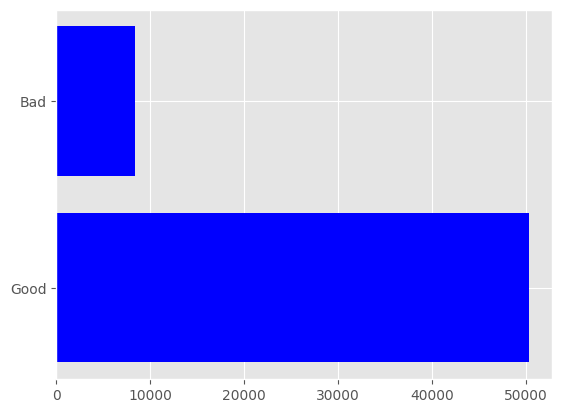

,Loan Status,Count
0,Good,50295
1,Bad,8350


In [20]:
ls = train.loan_status.value_counts().reset_index()
ls.columns = ['Loan Status', 'Count']
def makereadable_status(x):
    if x == 0:
        return "Good"
    else:
        return 'Bad'

ls['Loan Status'] = ls['Loan Status'].apply(lambda x : makereadable_status(x))

plt.barh( np.array(ls['Loan Status']), ls['Count'], color='blue')
plt.show()
ls

# Correlation Matrices

Training Set Correlation Matrix:


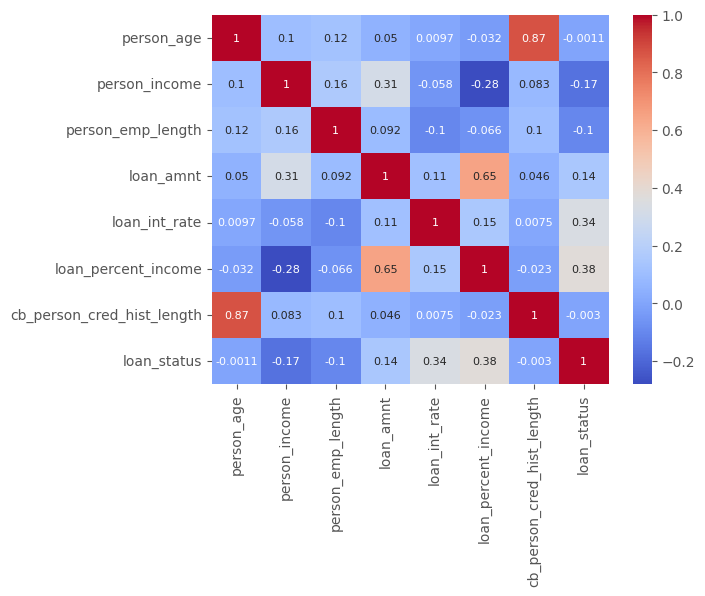

In [21]:
print("Training Set Correlation Matrix:")
# Calculate the correlation matrix
corr_matrix = train.select_dtypes(include='number').iloc[:,1:].corr()

# Plot the heatmap
sb.heatmap(corr_matrix, annot=True, annot_kws={"size":8}, cmap='coolwarm')
plt.show()

Testing Set Correlation Matrix:


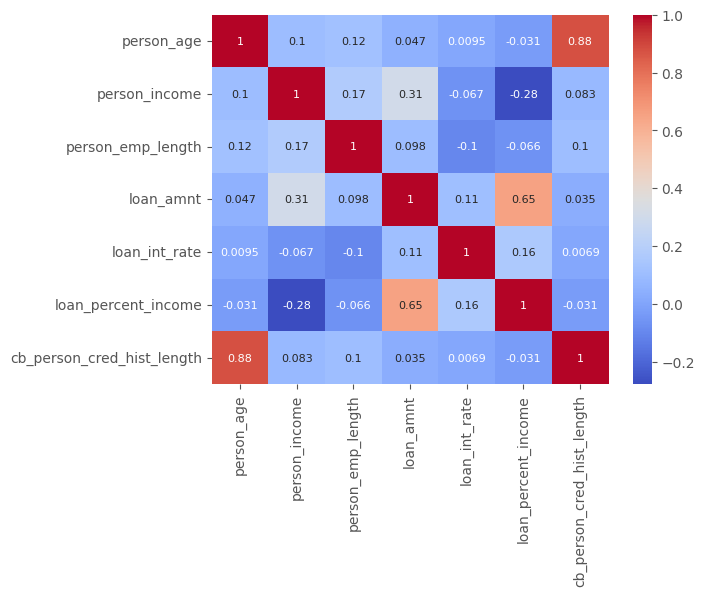

In [22]:
print("Testing Set Correlation Matrix:")
# Calculate the correlation matrix
corr_matrix = test.select_dtypes(include='number').iloc[:,1:].corr()

# Plot the heatmap
sb.heatmap(corr_matrix, annot=True, annot_kws={"size":8}, cmap='coolwarm')
plt.show()

# Pair Plots

In [23]:
# we have to upgrade seaborn for these to work ;)
!pip install -U --quiet seaborn
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.10.0 requires scipy<1.14,>=1.4.1, but you have scipy 1.14.1 which is incompatible.


In [24]:
# let's sample the data to 10,000 rows
tt = train.sample(10000)

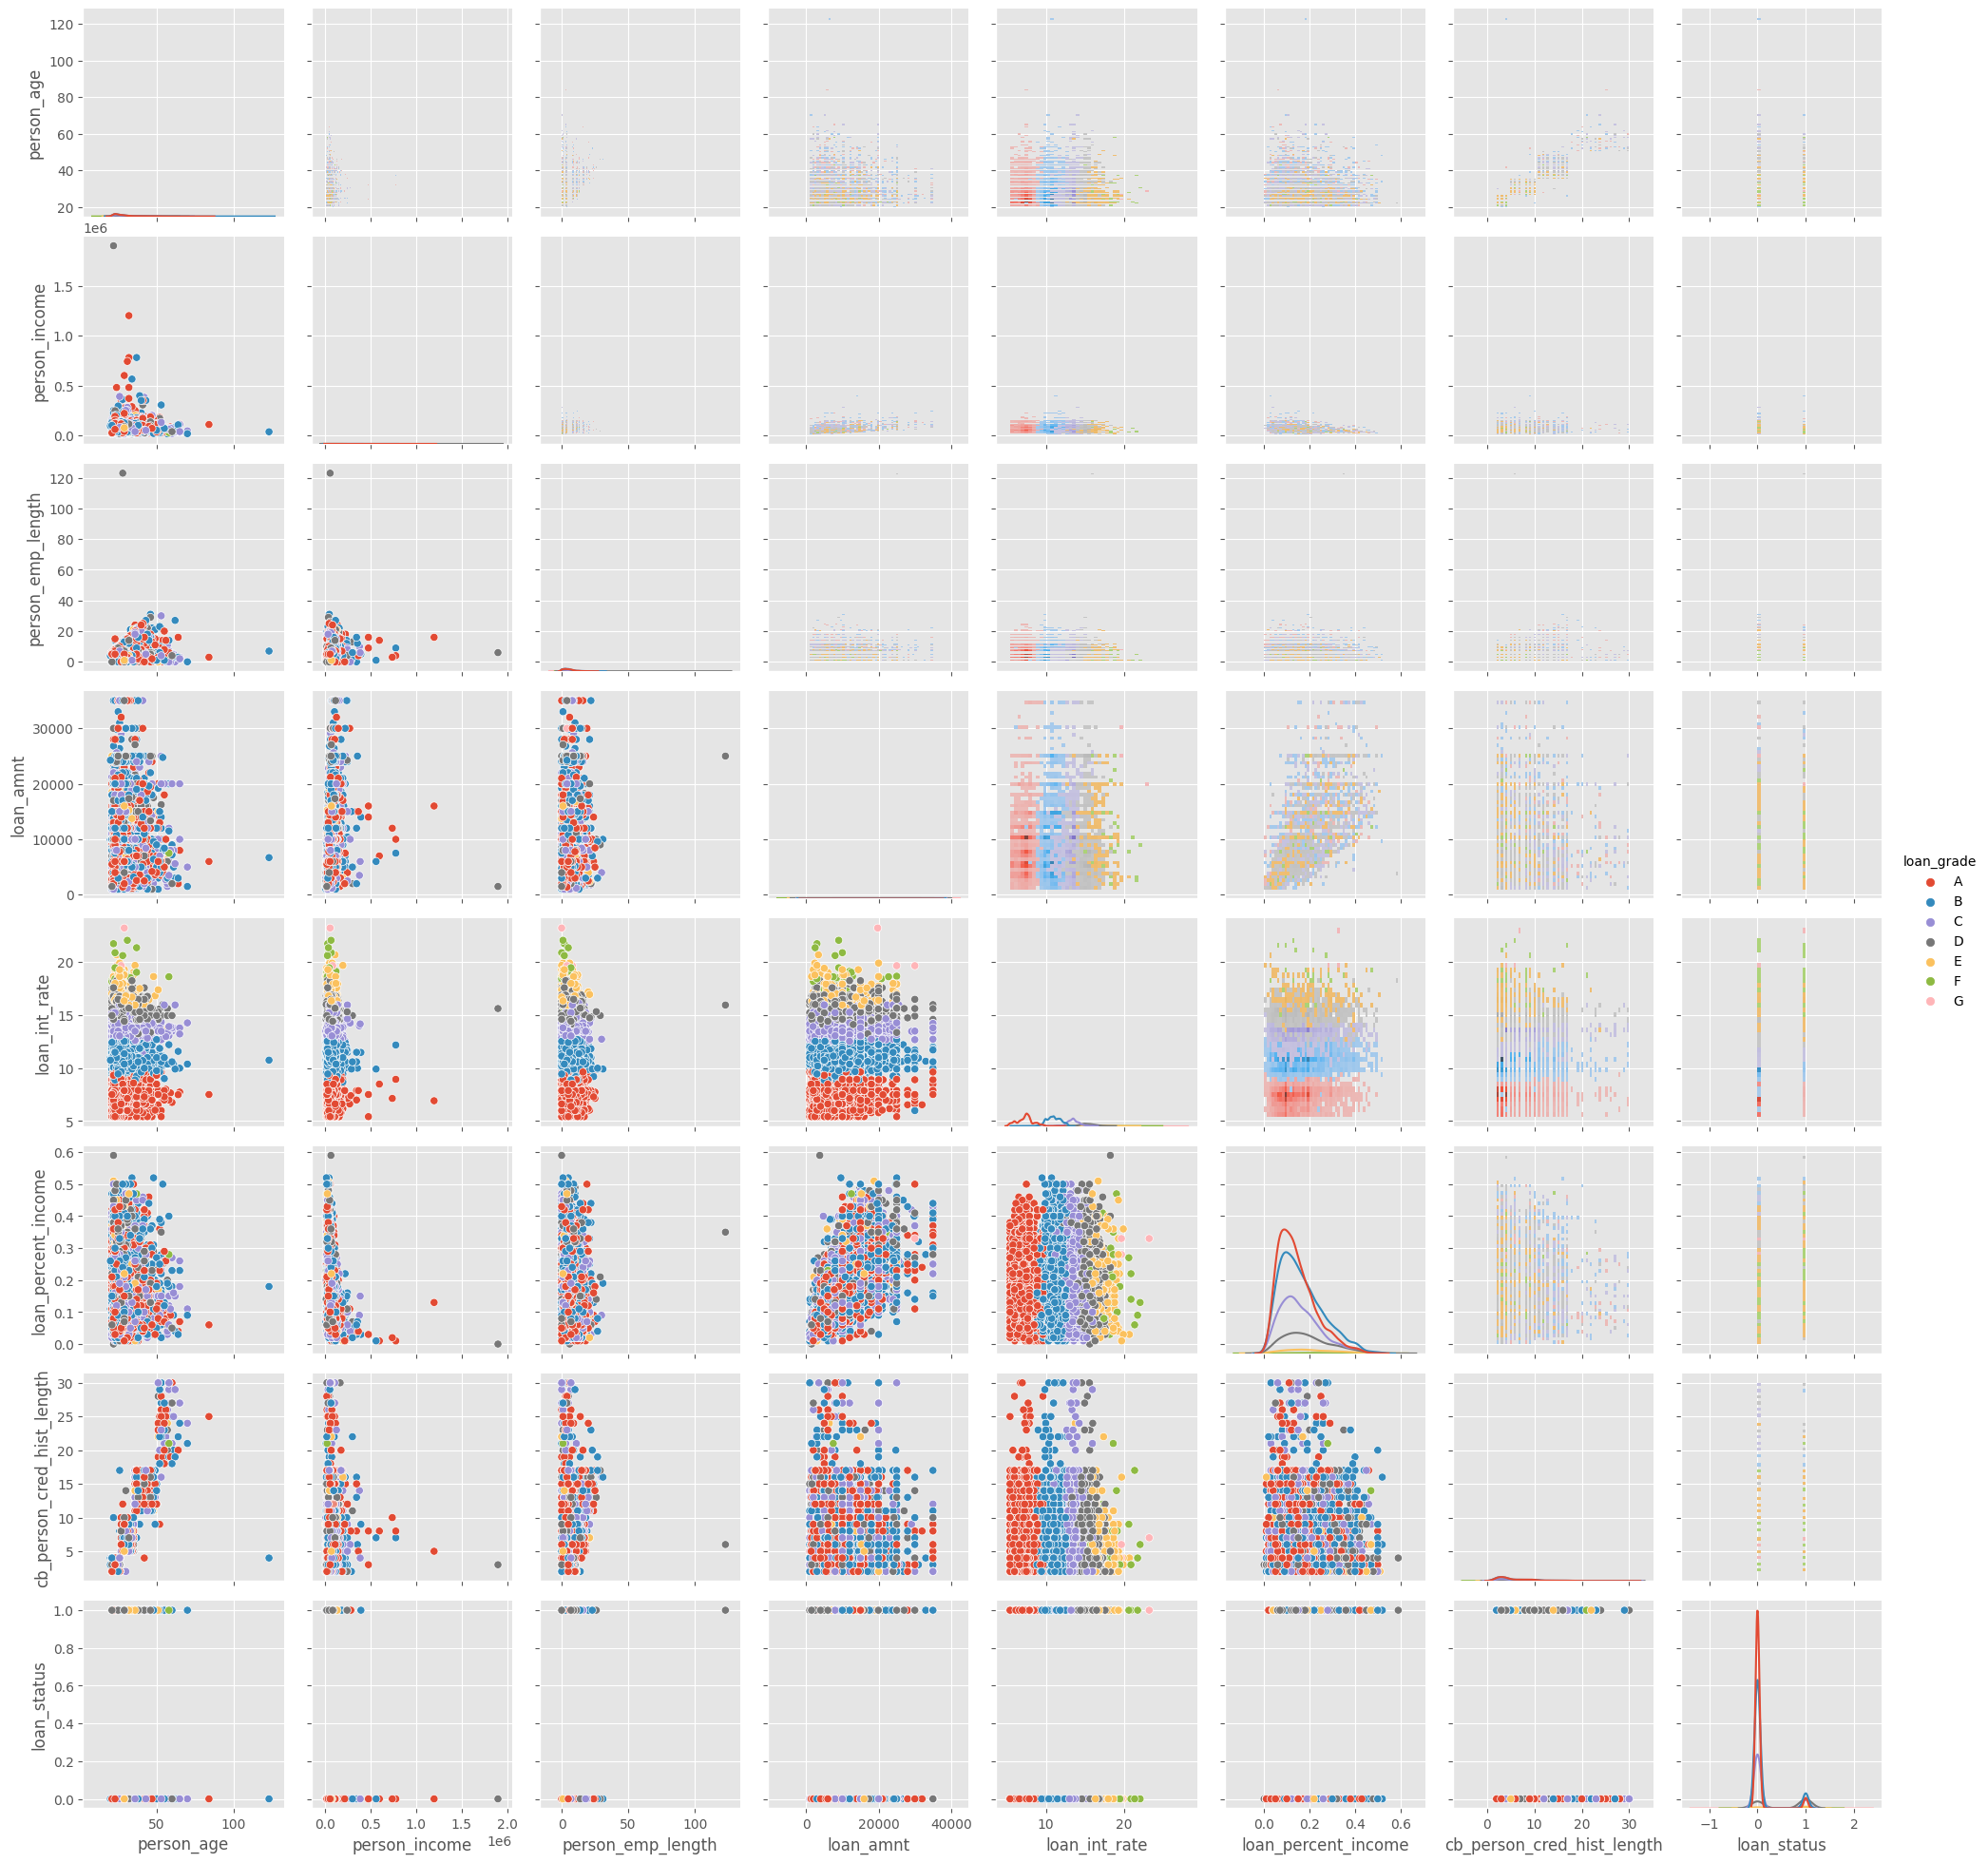

In [25]:
# color the dots by loan grade
ax = sb.PairGrid(tt.loc[:,[ 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status']],hue='loan_grade',hue_order=['A','B','C','D','E','F','G'])

 
ax.map_upper(sb.histplot)
ax.map_diag(sb.kdeplot)
ax.map_lower(sb.scatterplot)
ax.add_legend()
plt.show()



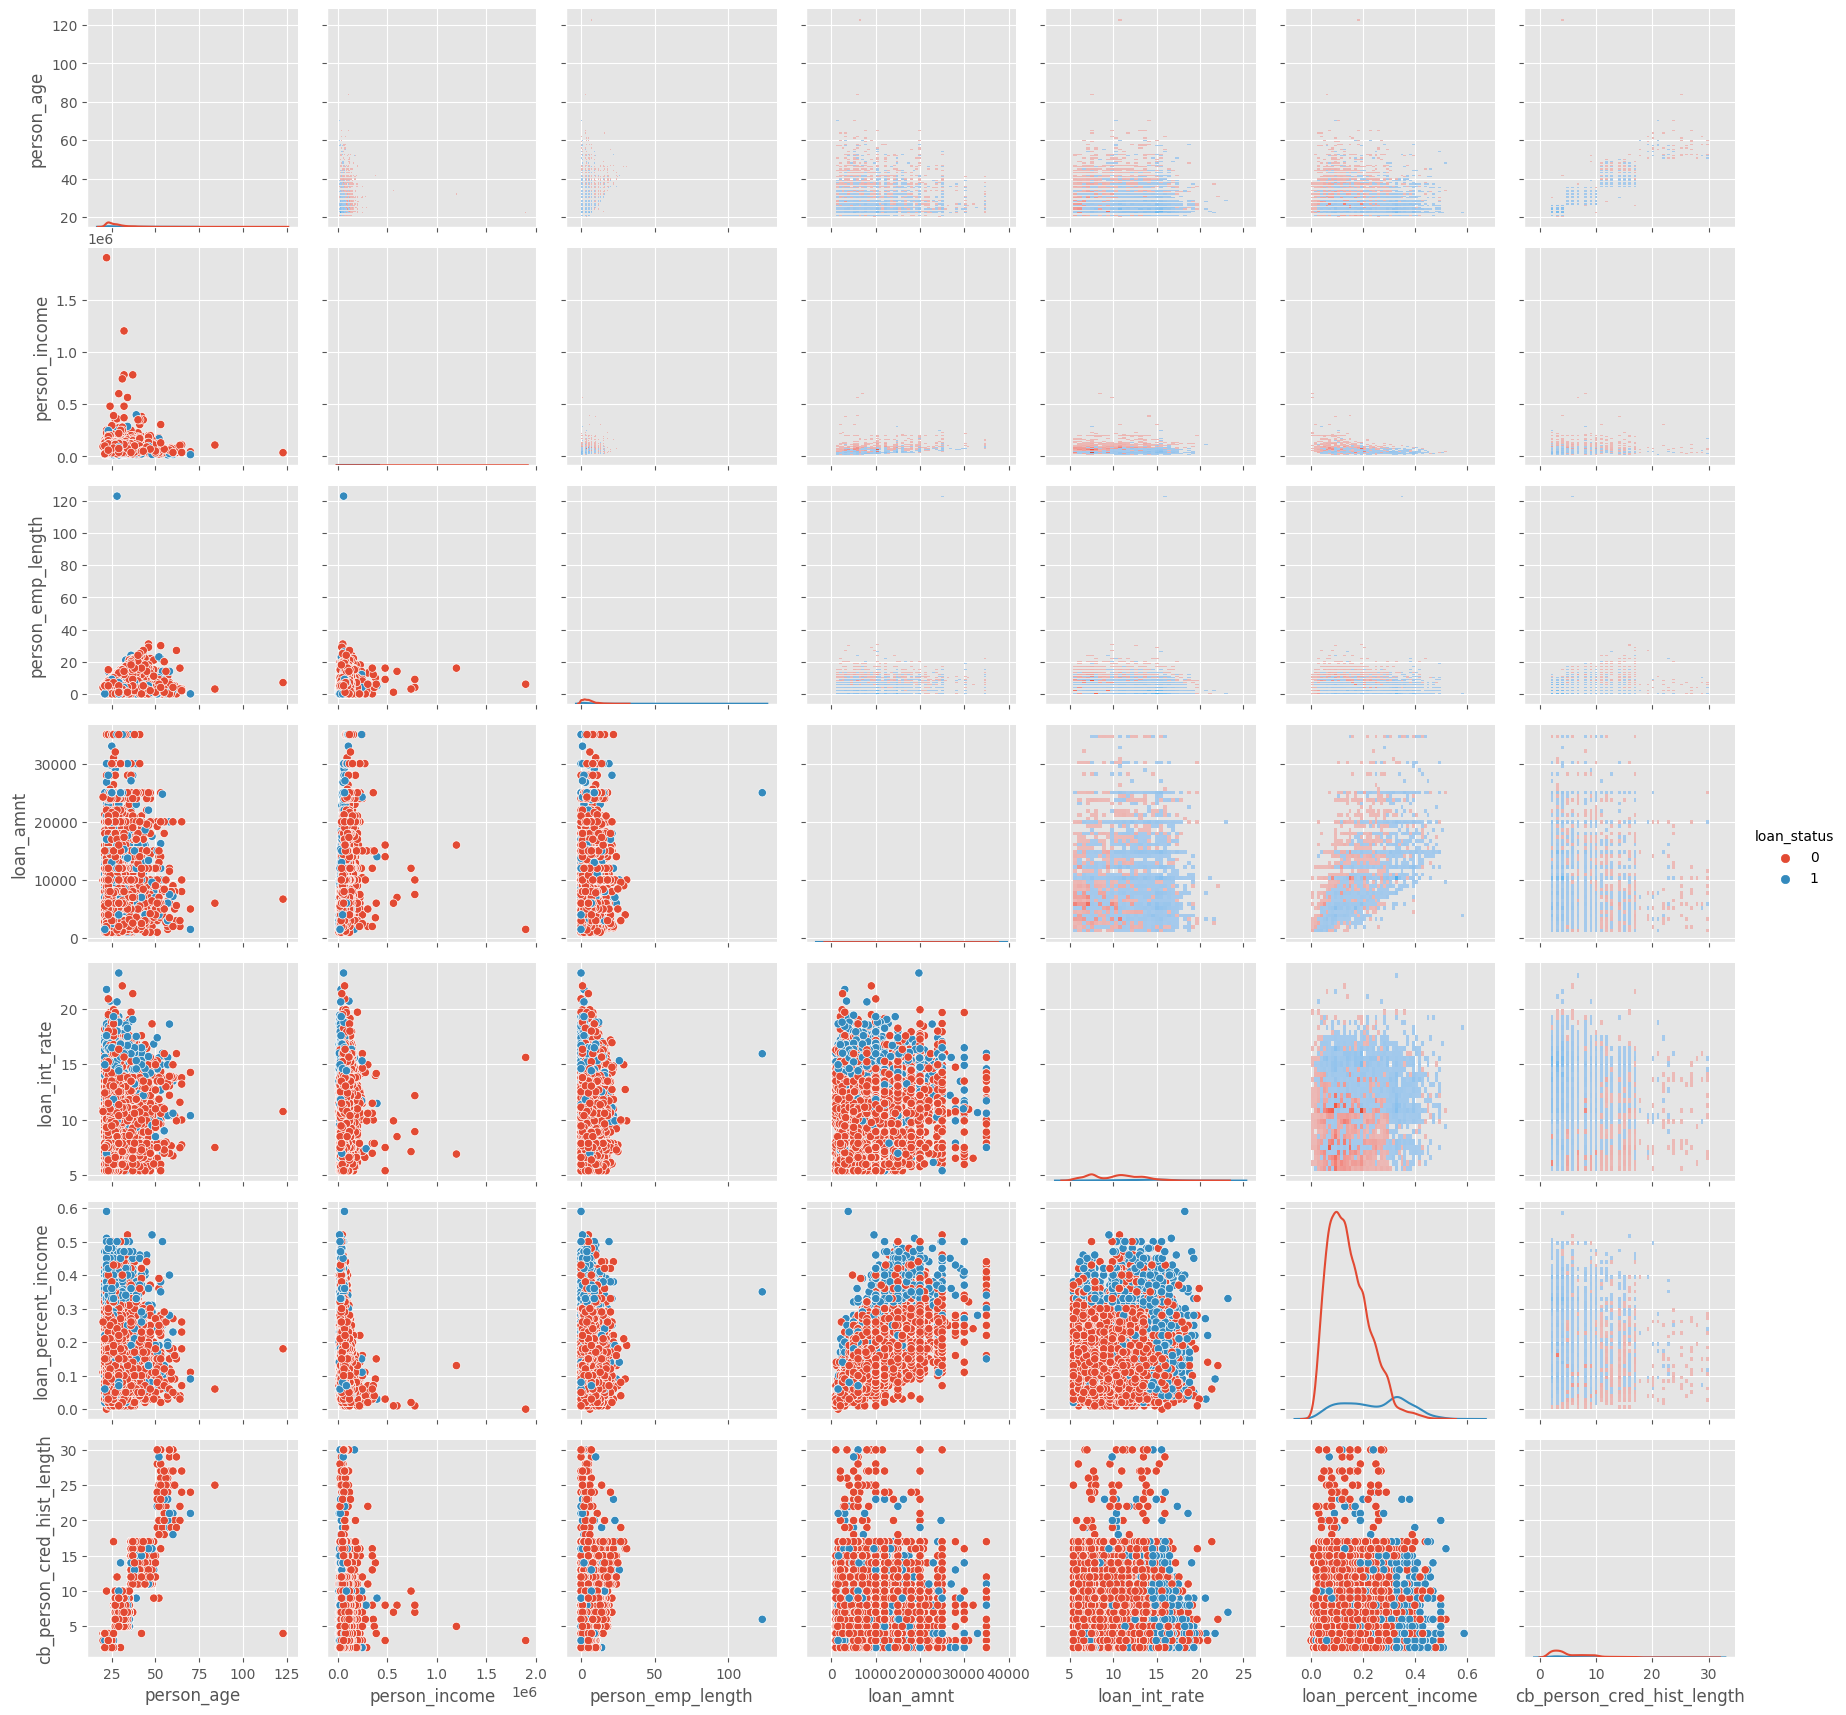

In [26]:
# color the dots by loan status
ax = sb.PairGrid(tt.loc[:,[ 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent',  'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status']],hue="loan_status")

  
ax.map_upper(sb.histplot)
ax.map_diag(sb.kdeplot)
ax.map_lower(sb.scatterplot)
ax.add_legend()
plt.show()

If any of this is useful to you, please copy and paste the code as you see fit.

Thanks for looking...

Happy Kaggling!!